# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import warnings
warnings.filterwarnings('ignore')
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
from newsapi import NewsApiClient
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to /home/wh/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
load_dotenv()

True

In [3]:
# Read your api key environment variable
# YOUR CODE HERE!
key = os.getenv("news_api_key")
type(key)

str

In [4]:
# Create a newsapi client
# YOUR CODE HERE!
newsapi = NewsApiClient(api_key = key)

In [5]:
# Fetch the Bitcoin news articles
# YOUR CODE HERE!
btc_articles = newsapi.get_everything(q = 'Bitcoin', language = 'en')
len(btc_articles)

3

In [6]:
# Fetch the Ethereum news articles
# YOUR CODE HERE!
eth_articles = newsapi.get_everything(q = 'Ethereum', language = 'en')
len(eth_articles)

3

In [7]:
# Create function to get sentiments from a dictionary of articles from newsapi
def get_sentiments(dictionary):
    results = []
    for x in dictionary['articles']:
        title = x['title']
        text = x["content"]
        date = x["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment['compound']
        positive = sentiment['pos']
        neutral = sentiment['neu']
        negative = sentiment['neg']
        results.append({
            'Title': title,
            'Text': text,
            'Date': date,
            'Compound': compound,
            'Positive': positive,
            'Neutral': neutral,
            'Negative': negative
        })
    
    return pd.DataFrame(results)

In [8]:
# Create the Bitcoin sentiment scores DataFrame
# YOUR CODE HERE!
btc_sentiments = get_sentiments(btc_articles)
btc_sentiments.tail()

,Title,Text,Date,Compound,Positive,Neutral,Negative
15,What does Uber and birth control have in common?,"Hello and welcome back to Equity, TechCrunchs ...",2021-06-14,0.4588,0.083,0.917,0.000
16,Gold is Dead? Should You Opt for Gold (Over Cr...,This story originally appeared on MarketBeatWh...,2021-06-22,0.0772,0.084,0.841,0.075
17,"UPDATE 1-Bitcoin rises 9.8% to $39,035 - Reuters","By Reuters Staff\r\n(Adds context, background)...",2021-06-13,0.0000,0.000,1.000,0.000
18,Cryptocurrencies tumble amid China crackdown o...,"TOKYO, June 21 (Reuters) - Cryptocurrencies tu...",2021-06-21,-0.2732,0.000,0.942,0.058
19,"Boom, bust and bewildered: Bitcoin's year so f...",A representation of virtual currency Bitcoin i...,2021-06-30,0.0000,0.000,1.000,0.000


In [9]:
# Create the Ethereum sentiment scores DataFrame
# YOUR CODE HERE!
eth_sentiments = get_sentiments(eth_articles)
eth_sentiments.tail()

,Title,Text,Date,Compound,Positive,Neutral,Negative
15,Bitcoin rises 9.8 percent to $39035 - Reuters,"Bitcoin surged 9.83 % to $39,035.47 at 22:05 G...",2021-06-13,-0.2732,0.0,0.94,0.06
16,"Bitcoin falls 8.5% to $31,700 - Reuters",By Reuters Staff\r\nJune 25 (Reuters) - Bitcoi...,2021-06-25,-0.3818,0.0,0.92,0.08
17,"Bitcoin rises 5.1 percent to $37,361 - Reuters",By Reuters Staff\r\nJune 13 (Reuters) - Bitcoi...,2021-06-13,0.0000,0.0,1.00,0.00
18,"Bitcoin rises 9.8 percent to $39,035 - Reuters",By Reuters Staff\r\nJune 13 (Reuters) - Bitcoi...,2021-06-13,0.0000,0.0,1.00,0.00
19,Bitcoin rises 5.1 percent to $37361 - Reuters,"Bitcoin rose 5.11 % to $37,360.63 at 18:10 GMT...",2021-06-13,-0.2732,0.0,0.94,0.06


In [10]:
# Describe the Bitcoin Sentiment
# YOUR CODE HERE!
btc_sentiments.describe()

,Compound,Positive,Neutral,Negative
count,20.000000,20.000000,20.000000,20.000000
mean,0.155820,0.076250,0.890800,0.032900
std,0.392435,0.070288,0.084871,0.053875
min,-0.612400,0.000000,0.705000,0.000000
25%,0.000000,0.032250,0.840250,0.000000
50%,0.128000,0.065500,0.905000,0.000000
75%,0.369700,0.107250,0.955500,0.058000
max,0.840200,0.282000,1.000000,0.184000


In [11]:
# Describe the Ethereum Sentiment
# YOUR CODE HERE!
eth_sentiments.describe()

,Compound,Positive,Neutral,Negative
count,20.000000,20.000000,20.000000,20.000000
mean,0.063475,0.040500,0.934350,0.025150
std,0.356132,0.058708,0.053135,0.032347
min,-0.381800,0.000000,0.806000,0.000000
25%,-0.273200,0.000000,0.920000,0.000000
50%,0.000000,0.000000,0.936500,0.000000
75%,0.361200,0.074750,0.961000,0.060250
max,0.771700,0.194000,1.000000,0.080000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin: 0.076250

Q: Which coin had the highest compound score?

A: Bitcoin: 0.840200

Q. Which coin had the highest positive score?

A: Bitcoin: 0.282000

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [12]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /home/wh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/wh/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [13]:
# Instantiate the lemmatizer
# YOUR CODE HERE!
lemmatizer = WordNetLemmatizer()
# Create a list of stopwords
# YOUR CODE HERE!
sw = set(stopwords.words('english'))
# Expand the default stopwords list if necessary
# YOUR CODE HERE!
print(sw)

{'about', 'all', 'him', 'this', 'if', 'further', 'yourselves', 'shouldn', 'other', 'a', 'does', 'once', "don't", 'no', 'ourselves', 'her', 'needn', 'but', "you've", 'aren', 'some', 'are', 'only', 'couldn', 'same', 'myself', 'when', 'i', 'own', 'their', 'not', 'itself', 'am', 'nor', "hadn't", 'hers', 'themselves', 'from', 'while', 'won', "you'd", 'your', 're', 'off', 'hasn', 'under', 'weren', 'now', 'as', 'on', 'more', "should've", 'he', 'there', 'theirs', 'should', 'any', 'in', 'have', 'had', 'to', 'out', 'do', 'the', 'how', 'for', 'below', "couldn't", 'after', 'between', 'wasn', 'over', "she's", "shan't", 'his', "mightn't", "you'll", 'whom', "haven't", 'against', 'will', 'it', 'y', 'those', 'o', 'they', "hasn't", 'than', 'during', 't', "shouldn't", 'we', 'were', 'our', 'here', 'can', 'didn', "weren't", 'what', 'been', 'few', 'so', "you're", "needn't", 'haven', 'you', 'mightn', 'ain', 'both', 'who', 'by', 's', 'before', 'because', 'very', 'just', 'did', 'ma', 'these', 'and', "wouldn't"

In [37]:
# Tokenizes Text from DataFrame
def tokenizer(df):
    regex = re.compile("[^a-zA-Z ]")
    df['Tokens'] = ""

    for i in range(len(df)):
        
        # Remove the punctuation from text
        clean = regex.sub("", df['Text'].loc[i])
        
        # Tokenizes text
        words = word_tokenize(clean)
        
        # Convert the words to lowercase & Remove the stop words
        words = [x.lower() for x in words if x.lower() not in sw]
        
        # Lemmatize words into root words
        words = [lemmatizer.lemmatize(x) for x in words]
        df['Tokens'][i] = words
    
    return df

In [38]:
# Create a new tokens column for Bitcoin
# YOUR CODE HERE!
btc_tokenized = tokenizer(btc_sentiments)
btc_tokenized.head()

,Title,Text,Date,Compound,Positive,Neutral,Negative,Tokens
0,El Salvador becomes the first country to appro...,El Salvador's President Nayib Bukele has made ...,2021-06-09,0.8402,0.282,0.718,0.000,"[el, salvador, president, nayib, bukele, made,..."
1,El Salvador Becomes First Country to Recognize...,El Salvador has become the first country in th...,2021-06-09,0.1280,0.043,0.957,0.000,"[el, salvador, become, first, country, world, ..."
2,Elon Musk says Tesla will resume Bitcoin purch...,"It's all about clean energy, it seems. \r\nElo...",2021-06-14,0.6908,0.169,0.831,0.000,"[clean, energy, seemselon, musk, tesla, caused..."
3,Kaseya ransomware attackers demand $70 million...,Filed under:\r\nThe supply chain attack has re...,2021-07-05,-0.5719,0.111,0.705,0.184,"[filed, underthe, supply, chain, attack, reach..."
4,Bitcoin: El Salvador makes cryptocurrency lega...,image captionThe move means bitcoin will be ac...,2021-06-09,0.2732,0.060,0.940,0.000,"[image, captionthe, move, mean, bitcoin, accep..."


In [39]:
# Create a new tokens column for Ethereum
# YOUR CODE HERE!
eth_tokenized = tokenizer(eth_sentiments)
eth_tokenized.tail()

,Title,Text,Date,Compound,Positive,Neutral,Negative,Tokens
15,Bitcoin rises 9.8 percent to $39035 - Reuters,"Bitcoin surged 9.83 % to $39,035.47 at 22:05 G...",2021-06-13,-0.2732,0.0,0.94,0.06,"[bitcoin, surged, gmt, sunday, adding, previou..."
16,"Bitcoin falls 8.5% to $31,700 - Reuters",By Reuters Staff\r\nJune 25 (Reuters) - Bitcoi...,2021-06-25,-0.3818,0.0,0.92,0.08,"[reuters, staffjune, reuters, bitcoin, dipped,..."
17,"Bitcoin rises 5.1 percent to $37,361 - Reuters",By Reuters Staff\r\nJune 13 (Reuters) - Bitcoi...,2021-06-13,0.0000,0.0,1.00,0.00,"[reuters, staffjune, reuters, bitcoin, rose, g..."
18,"Bitcoin rises 9.8 percent to $39,035 - Reuters",By Reuters Staff\r\nJune 13 (Reuters) - Bitcoi...,2021-06-13,0.0000,0.0,1.00,0.00,"[reuters, staffjune, reuters, bitcoin, surged,..."
19,Bitcoin rises 5.1 percent to $37361 - Reuters,"Bitcoin rose 5.11 % to $37,360.63 at 18:10 GMT...",2021-06-13,-0.2732,0.0,0.94,0.06,"[bitcoin, rose, gmt, sunday, adding, previous,..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [17]:
from collections import Counter
from nltk import ngrams

In [87]:
# Generate the Bitcoin N-grams where N=2
# YOUR CODE HERE!
btc_tokens = []
[btc_tokens.append(btc_tokenized['Tokens'][x]) for x in range(len(btc_tokenized))]
btc_tokens = [item for sublist in btc_tokens for item in sublist]
btc_ngrams = Counter(ngrams(btc_tokens, n = 2))
btc_ngrams

Counter({('el', 'salvador'): 6,
         ('salvador', 'president'): 1,
         ('president', 'nayib'): 2,
         ('nayib', 'bukele'): 2,
         ('bukele', 'made'): 1,
         ('made', 'good'): 1,
         ('good', 'promise'): 1,
         ('promise', 'adopt'): 1,
         ('adopt', 'bitcoin'): 1,
         ('bitcoin', 'legal'): 6,
         ('legal', 'tender'): 5,
         ('tender', 'official'): 1,
         ('official', 'central'): 1,
         ('central', 'american'): 3,
         ('american', 'country'): 1,
         ('country', 'congress'): 1,
         ('congress', 'voted'): 1,
         ('voted', 'accept'): 1,
         ('accept', 'cryptocurrency'): 1,
         ('cryptocurrency', 'majori'): 1,
         ('majori', 'char'): 1,
         ('char', 'el'): 1,
         ('salvador', 'become'): 2,
         ('become', 'first'): 2,
         ('first', 'country'): 2,
         ('country', 'world'): 2,
         ('world', 'recognize'): 1,
         ('recognize', 'cryptocurrency'): 1,
         ('crypt

In [88]:
# Generate the Ethereum N-grams where N=2
# YOUR CODE HERE!
eth_tokens = []
[eth_tokens.append(eth_tokenized['Tokens'][x]) for x in range(len(eth_tokenized))]
eth_tokens = [item for sublist in eth_tokens for item in sublist]
eth_ngrams = Counter(ngrams(eth_tokens, n = 2))
eth_ngrams

Counter({('tldr', 'cryptocurrency'): 2,
         ('cryptocurrency', 'ethereum'): 5,
         ('ethereum', 'solidity'): 2,
         ('solidity', 'blockchain'): 2,
         ('blockchain', 'developer'): 2,
         ('developer', 'bundle'): 2,
         ('bundle', 'sale'): 1,
         ('sale', 'june'): 1,
         ('june', 'saving'): 1,
         ('saving', 'list'): 1,
         ('list', 'priceis'): 1,
         ('priceis', 'everyone'): 1,
         ('everyone', 'know'): 1,
         ('know', 'investing'): 1,
         ('investing', 'cryptocurrency'): 1,
         ('cryptocurrency', 'char'): 5,
         ('char', 'wasnt'): 1,
         ('wasnt', 'long'): 1,
         ('long', 'ago'): 1,
         ('ago', 'average'): 1,
         ('average', 'person'): 1,
         ('person', 'clue'): 1,
         ('clue', 'nft'): 1,
         ('nft', 'nowadays'): 1,
         ('nowadays', 'theyre'): 1,
         ('theyre', 'making'): 1,
         ('making', 'headline'): 1,
         ('headline', 'selling'): 1,
         ('sell

In [83]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [84]:
# Use token_count to get the top 10 words for Bitcoin
# YOUR CODE HERE!
token_count(btc_tokens)

[('char', 20),
 ('bitcoin', 16),
 ('salvador', 9),
 ('reuters', 9),
 ('el', 6),
 ('legal', 6),
 ('u', 6),
 ('tender', 5),
 ('country', 5),
 ('june', 5)]

In [85]:
# Use token_count to get the top 10 words for Ethereum
# YOUR CODE HERE!
token_count(eth_tokens)

[('char', 19),
 ('cryptocurrency', 15),
 ('world', 11),
 ('bitcoin', 9),
 ('biggest', 8),
 ('previous', 7),
 ('closebitcoin', 7),
 ('bestknown', 7),
 ('ethereum', 6),
 ('network', 6)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [23]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

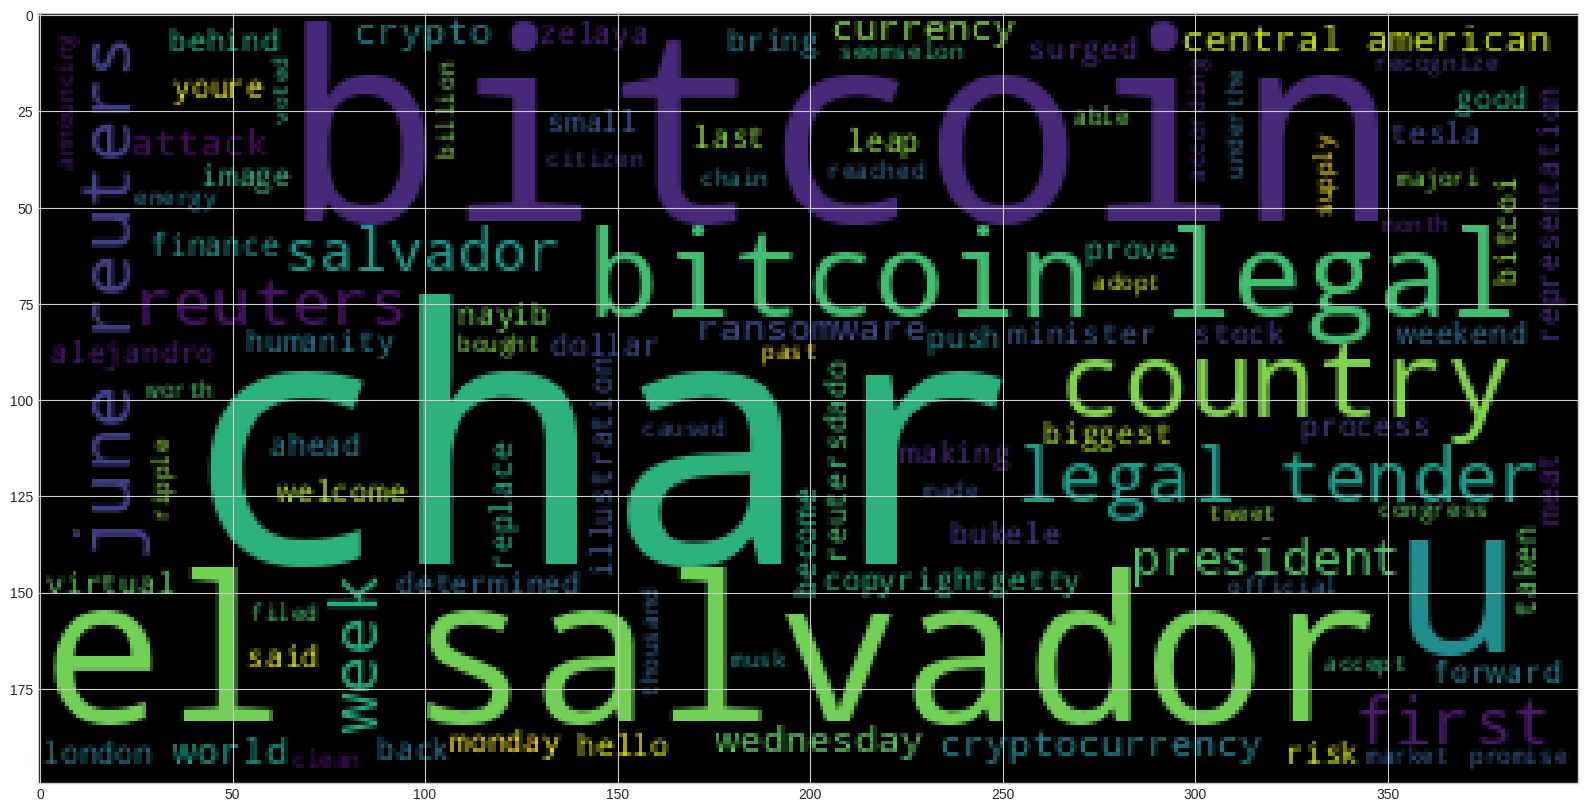

In [91]:
# Generate the Bitcoin word cloud
# YOUR CODE HERE!
big_string = ' '.join(btc_tokens)
wc = WordCloud().generate(big_string)
plt.imshow(wc)

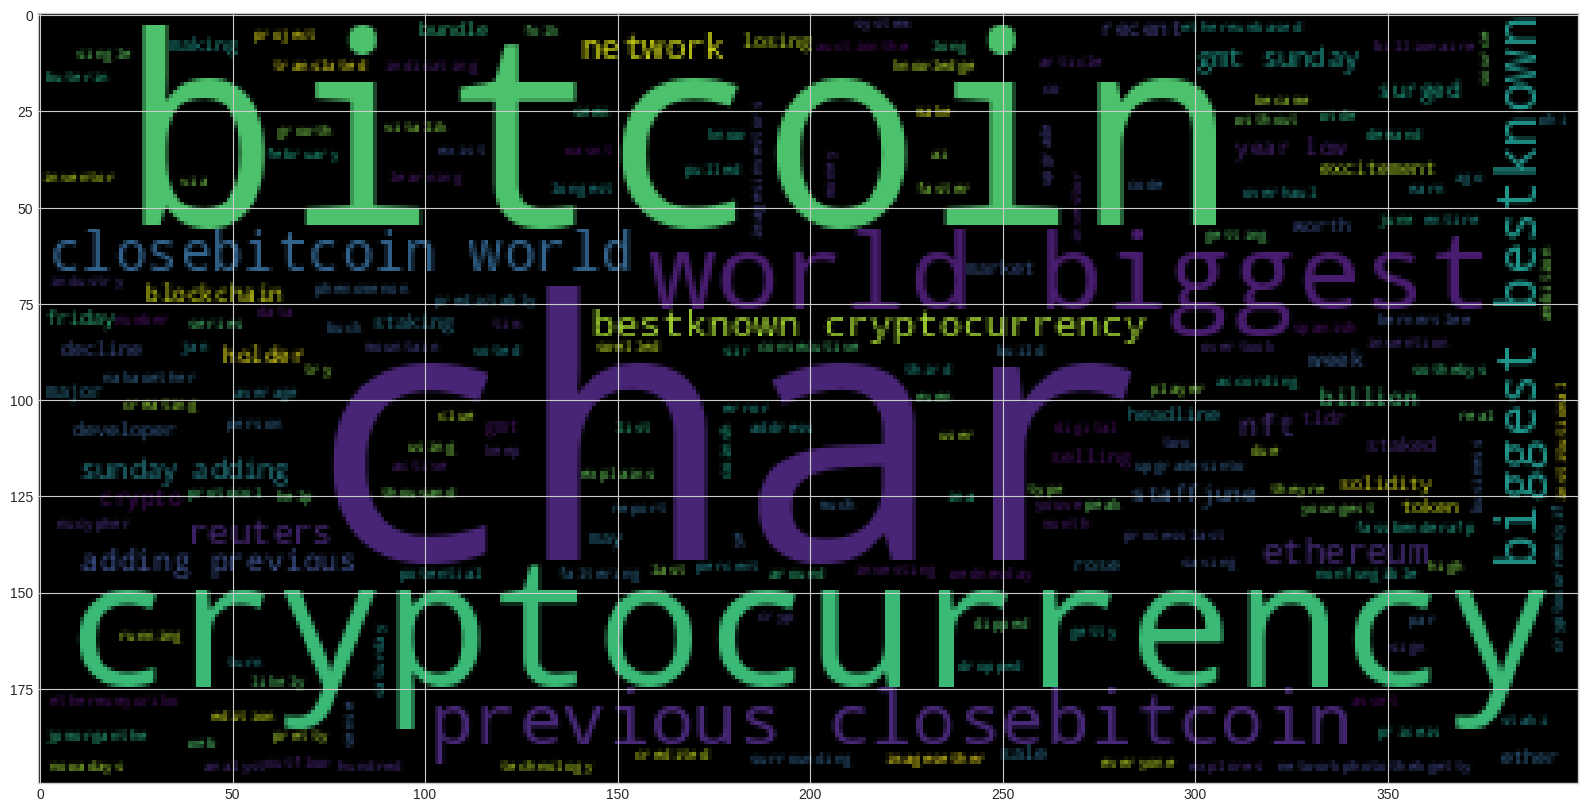

In [92]:
# Generate the Ethereum word cloud
# YOUR CODE HERE!
big_string = ' '.join(eth_tokens)
wc = WordCloud().generate(big_string)
plt.imshow(wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [93]:
import spacy
from spacy import displacy

In [94]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [95]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [29]:
# Concatenate all of the Bitcoin text together
# YOUR CODE HERE!

In [30]:
# Run the NER processor on all of the text
# YOUR CODE HERE!

# Add a title to the document
# YOUR CODE HERE!

In [31]:
# Render the visualization
# YOUR CODE HERE!

In [32]:
# List all Entities
# YOUR CODE HERE!

---

### Ethereum NER

In [33]:
# Concatenate all of the Ethereum text together
# YOUR CODE HERE!

In [34]:
# Run the NER processor on all of the text
# YOUR CODE HERE!

# Add a title to the document
# YOUR CODE HERE!

In [35]:
# Render the visualization
# YOUR CODE HERE!

In [36]:
# List all Entities
# YOUR CODE HERE!

---